In [4]:
import numpy as np
import pickle
import matplotlib.pyplot as plt

file = open('gamma1.pickle', 'rb')
solutions = pickle.load(file)
file.close()

Mean Squared Displacement: 5.323330133452506


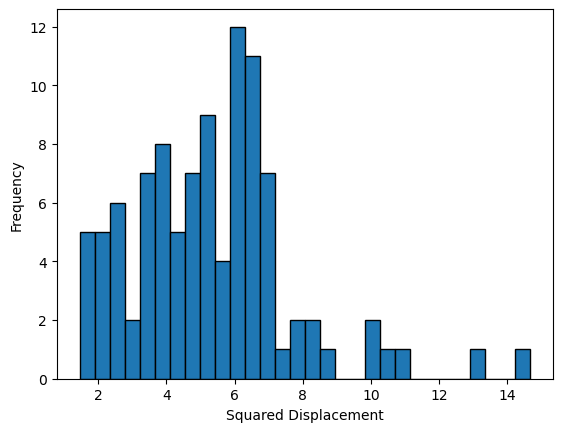

In [5]:
times = []
# Note that solutions are calculated from RK45, where time steps vary based 
# on trajectory. Each particle may have different no. of time steps.

squared_displacements = []


for sol in solutions:

    x = sol[:,0]
    y = sol[:,1]
    
    initial_x = x[0]
    initial_y = y[0]
    
    final_x = x[-1]
    final_y = y[-1]
    
    squared_displacement = (final_x - initial_x)**2 + (final_y - initial_y)**2
    squared_displacements.append(squared_displacement)


MSD = sum(squared_displacements)/len(squared_displacements)
print("Mean Squared Displacement:", MSD)
plt.hist(squared_displacements, bins = 30, edgecolor='black')
plt.xlabel("Squared Displacement")
plt.ylabel("Frequency")
plt.show()

Text(0, 0.5, 'Squared Displacement')

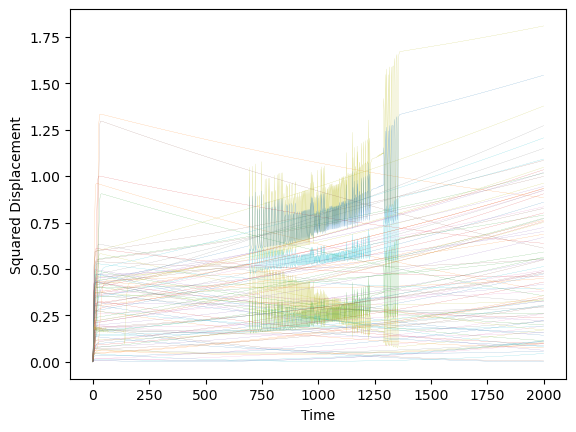

In [6]:
# Plots of the mean squared displacements for each particle as time evolves
displacements_wrt_t = []
n = 2001
times = range(0, 2001)

for a, sol in enumerate(solutions):
    x = sol[:,0]
    y = sol[:,1]
    initial_x = x[0]
    initial_y = y[0]
    particle_displacements = []
    for i in range(n): # Calculate squared displacement for a particle at each time point
        new_x = x[i]
        new_y = y[i]
        squared_displacement = (new_x - initial_x)**2 + (new_y - initial_y)**2
        particle_displacements.append(squared_displacement)
    displacements_wrt_t.append(particle_displacements)
    

# Now displacements_wrt_t has displacements at each time for each particle.
for i, particle_displacements in enumerate(displacements_wrt_t):
    if max(particle_displacements) > 0:
        plt.plot(times, particle_displacements, linewidth = 0.1)

plt.xlabel("Time")
plt.ylabel("Squared Displacement")
#plt.show()

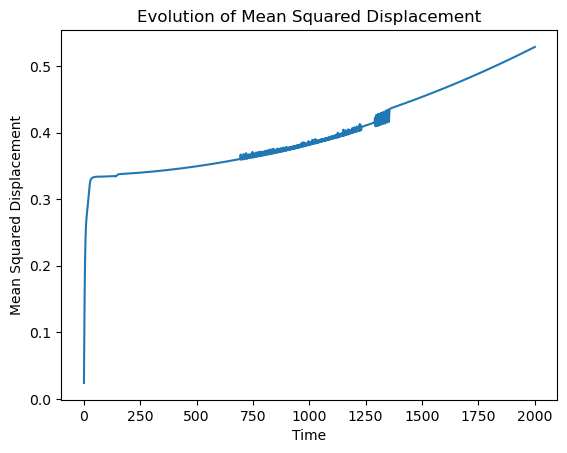

In [7]:
time_steps_list = range(1, 2001) # Taking values at every integer time, can adjust this.
MSD_list = []
particle_displacement_dist = []

for time in time_steps_list:
    particle_displacements = []
    for sol in solutions:
        
        x = sol[:,0]
        y = sol[:,1]
        initial_x = x[0]
        initial_y = y[0]
        

        new_x = x[time]
        new_y = y[time]
    
        squared_displacement = (new_x - initial_x)**2 + (new_y - initial_y)**2
        particle_displacements.append(squared_displacement)
    
    MSD = sum(particle_displacements)/len(particle_displacements)
    MSD_list.append(MSD)
    particle_displacement_dist.append(particle_displacements)

plt.plot(time_steps_list, MSD_list)
plt.xlabel("Time")
plt.ylabel("Mean Squared Displacement")
plt.title("Evolution of Mean Squared Displacement")
plt.show()

In [8]:
#Dispersion relation
R_dim = 30e3
R_nondim = R_dim/300e3
beta_dim = 2e-12
beta_nondim = beta_dim * 86400 * 300e3

#Fourier harmonics
S = 10 #spectral radius
N = 41

def omega(k,l):
    return -beta_nondim * k / (k**2 + l**2 + R_nondim**-2)

P = 5 #radius of peak
H = 0.008 #height of peak (max amplitude)

def A(k,l):
  return H * np.exp(-0.5*(k**2+l**2-P**2)**2/(2*P**2))

k,l = np.linspace(-S,S,N),np.linspace(-S,S,N)
K,L = np.meshgrid(k,l)
phi = np.random.uniform(0,2*np.pi,size=(N,N))
omega_vals = omega(K,L)

def modulo_grid(x, y):
  x_mod = np.mod(x + np.pi, 2 * np.pi) - np.pi
  y_mod = np.mod(y + np.pi, 2 * np.pi) - np.pi
  return x_mod, y_mod

def f(t,pos):
  x_mod,y_mod = modulo_grid(*pos)
  t = 30
  dx = -np.real(np.sum(1j*K*A(K,L)*np.exp(1j*(K*x_mod + L*y_mod - omega_vals*t + phi))))
  dy = np.real(np.sum(1j*L*A(K,L)*np.exp(1j*(K*x_mod + L*y_mod - omega_vals*t + phi))))
  return [dx,dy]

In [9]:
# Helping out with Velocity autocorrelation


vaf_list=[] #empty velocity autocorrelations list
time_steps_list= range(0,10001)

for time in time_steps_list:
    
    dot_prod = 0 #initialise dot product for each different time
    
    for sol in solutions:

        x = sol[:,0] #extrapolate coordinates for position to feed into function f 
        y = sol[:,1]
        
        initial_time = 0
        initial_x = x[0]
        initial_y = y[0]
        initial_x_vel = f(initial_time, [initial_x, initial_y])[0]
        initial_y_vel = f(initial_time, [initial_x, initial_y])[1]
        
        new_x = x[time]
        new_y = y[time]
        
        vel = f(time, [new_x, new_y]) #computes x velocity at specific time and position        
        x_vel = vel[0]
        y_vel = vel[1]
        
        dot_prod += initial_x_vel * x_vel + initial_y_vel * y_vel
        
    vaf_list.append(dot_prod/2000)

for vaf in vaf_list:
    print(vaf)

fig, ax = plt.subplots()
ax.plot(time_steps_list, vaf_list)
fig.set_size_inches(10, 8)
plt.xlabel('Time')
plt.ylabel('Correlation')
plt.title('Lagrangian V Autocorrelation of Particle Tracers')
plt.show()

KeyboardInterrupt: 